In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob 
import os
import librosa
from librosa import display

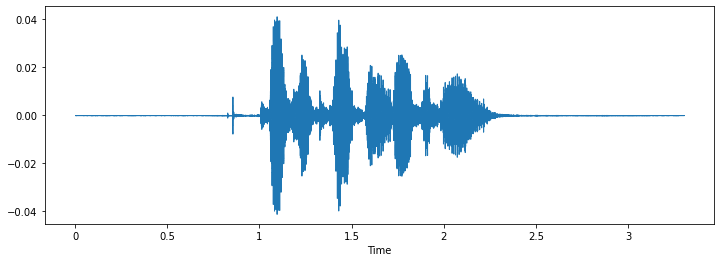

In [2]:
data, sampling_rate = librosa.load('Audios/Audio_Speech/Actor_01/03-01-01-01-01-01-01.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [3]:
path = 'Audios'
lst = []

i = 0
for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        i = i + 1
        if i%1000 == 999:
            print(i)
        emotion = file.split('-')[2]
        if emotion != "02":
            #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
            file = file[6:8]
            arr = mfccs, file
            lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

999
1999


In [4]:
lst

[(array([-5.92968567e+02,  5.58934746e+01, -1.98367176e+01,  1.55365572e+01,
         -4.79433823e+00, -3.64649653e-01, -1.60151844e+01, -4.50567484e+00,
         -2.24467583e+01, -5.30258560e+00, -3.21678519e+00, -6.32575560e+00,
         -4.76676750e+00, -5.82967901e+00, -4.81415844e+00,  3.50686502e+00,
         -1.29739103e+01, -5.67043543e+00, -3.69171000e+00, -5.06036997e+00,
         -8.07241917e+00, -2.19161296e+00, -7.27878475e+00, -8.18174076e+00,
         -1.57333159e+00, -6.39131069e+00, -5.86956406e+00, -2.21247792e+00,
         -6.18055248e+00, -4.14034414e+00, -5.83365822e+00, -6.58000755e+00,
         -2.47147226e+00, -3.67945337e+00, -3.85655135e-01,  1.37049687e+00,
          5.21270895e+00,  4.10505915e+00,  8.52840424e+00,  1.16430235e+01],
        dtype=float32),
  '01'),
 (array([-5.7227014e+02,  5.4515331e+01, -2.0434851e+01,  1.5288506e+01,
         -3.7721055e+00, -1.7467762e+00, -1.6040491e+01, -3.8343236e+00,
         -2.1938566e+01, -8.5506755e-01, -3.451057

In [123]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [124]:
X = np.asarray(X)
y = np.asarray(y)
y = y.astype(float)

X.shape, y.shape

((2076, 40), (2076,))

In [125]:
Y = []
for i in y:
    if i == 1.:
        Y.append(4)
    elif i == 3.:
        Y.append(3)
    elif i == 4.:
        Y.append(5)
    elif i == 5.:
        Y.append(0)
    elif i == 6.:
        Y.append(2)
    elif i == 7.:
        Y.append(1)
    elif i == 8.:
        Y.append(6)

In [126]:
Y = np.array(Y).astype(float)

In [127]:
X.shape, Y.shape

((2076, 40), (2076,))

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=663)

In [129]:
np.amax(y_train)

6.0

In [130]:
X_train[0]

array([-5.7584271e+02,  5.6641521e+01, -8.6608715e+00,  1.3950395e+01,
        3.8555312e+00,  3.6680100e+00, -1.0837946e+01, -7.1688128e+00,
       -1.3292554e+01, -3.3308976e+00, -5.4287729e+00, -2.3060224e+00,
       -4.2171931e+00,  3.3562603e+00, -4.8433871e+00,  3.2090948e+00,
       -6.6049581e+00,  2.7592012e-01, -2.8515904e+00, -2.3625078e+00,
       -4.0758796e+00, -7.1914989e-01, -3.2884126e+00, -2.2660842e+00,
       -3.4851339e+00, -1.9468015e+00, -1.7595440e+00, -1.5260091e+00,
        9.8192133e-02,  1.8554814e+00,  2.8624434e+00,  1.7973005e+00,
        3.3968852e+00,  2.2983711e+00,  2.6302912e+00,  3.9043376e+00,
        2.8166673e+00,  3.0256712e+00,  2.3002932e+00,  1.6166082e-01],
      dtype=float32)

In [131]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
x_traincnn.shape, x_testcnn.shape

((1453, 40, 1), (623, 40, 1))

In [132]:
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop



In [133]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))
# model.add(Activation('softmax'))
opt = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 40, 128)           768       
_________________________________________________________________
activation_33 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_34 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 5, 128)          

In [134]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [135]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
91/91 [==============================] - 3s 16ms/step - loss: 7.0353 - accuracy: 0.1645 - val_loss: 2.6940 - val_accuracy: 0.1846
Epoch 2/1000
91/91 [==============================] - 1s 7ms/step - loss: 6.1901 - accuracy: 0.1466 - val_loss: 2.1909 - val_accuracy: 0.2119
Epoch 3/1000
91/91 [==============================] - 1s 10ms/step - loss: 5.4323 - accuracy: 0.1707 - val_loss: 2.0165 - val_accuracy: 0.2279
Epoch 4/1000
91/91 [==============================] - 1s 8ms/step - loss: 4.6218 - accuracy: 0.1982 - val_loss: 2.0202 - val_accuracy: 0.2504
Epoch 5/1000
91/91 [==============================] - 1s 10ms/step - loss: 4.1883 - accuracy: 0.1948 - val_loss: 1.8423 - val_accuracy: 0.2552
Epoch 6/1000
91/91 [==============================] - 1s 6ms/step - loss: 3.8204 - accuracy: 0.2017 - val_loss: 2.4959 - val_accuracy: 0.1830
Epoch 7/1000
91/91 [==============================] - 1s 6ms/step - loss: 3.5247 - accuracy: 0.2127 - val_loss: 1.7350 - val_accuracy: 0.2970
Epo

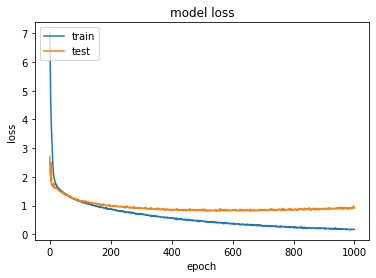

In [136]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

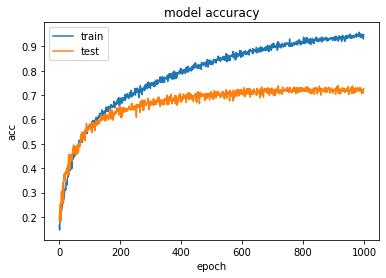

In [137]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [138]:
model_name = 'Emotion_Speech_Detection_Model.h5'

model.save(model_name)
print('Saved trained model at %s ' % model_name)

Saved trained model at Emotion_Speech_Detection_Model.h5 


In [5]:
import keras
loaded_model = keras.models.load_model('Emotion_Speech_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 40, 128)           768       
_________________________________________________________________
activation_121 (Activation)  (None, 40, 128)           0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_122 (Activation)  (None, 5, 128)            0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 5, 128)          

In [6]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

NameError: name 'x_testcnn' is not defined

In [139]:
x, sample_rate = librosa.load("clip.wav", res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [140]:
mfccs

array([-1.3477597e+02,  9.6822449e+01, -2.0756456e+01,  4.4834000e+01,
       -1.4644879e+01,  1.0511380e+01, -1.8306498e+01,  1.6705893e+00,
       -2.5086338e+01,  1.4450756e+01, -1.6179699e+01,  7.5057119e-01,
       -1.9020897e+01,  3.3102475e-02, -6.2348294e+00,  5.6462946e+00,
       -1.0498056e+01,  4.9788580e+00, -9.5053320e+00, -1.4563125e+01,
       -1.7375412e+01, -3.4251520e-01, -6.2224674e+00, -5.0496821e+00,
       -6.3574457e+00,  5.0338602e-01, -4.5386453e+00, -3.3303390e+00,
       -7.1238780e+00, -3.7020583e+00, -6.4683266e+00, -3.4286060e+00,
        1.6281439e+00,  1.3987217e+00, -5.7148319e-01, -1.0473944e+00,
        8.9071065e-01,  1.8257675e+00, -2.4308617e+00, -2.9467013e-01],
      dtype=float32)

In [149]:
model.predict(mfccs.reshape(1,40,1))

array([[1.3447503e-07, 5.1275713e-09, 9.9854833e-01, 1.4514977e-03,
        7.8826956e-25, 1.7685529e-13, 1.2865285e-20]], dtype=float32)

In [148]:
np.argsort(model.predict(mfccs.reshape(1,40,1)))

array([[4, 6, 5, 1, 0, 3, 2]])

In [142]:
labels_to_emotion = {0: 'anger',
                    1: 'disgust',
                    2: 'fear',
                    3: 'happy',
                    4: 'neutral',
                    5: 'sadness',
                    6: 'surprise'}



In [143]:
labels_to_emotion[np.argmax(model.predict(mfccs.reshape(40,1).reshape(1,40,1)))]

'fear'

In [78]:
mfccs.reshape(1,40,1)[0]

array([[-1.3477597e+02],
       [ 9.6822449e+01],
       [-2.0756456e+01],
       [ 4.4834000e+01],
       [-1.4644879e+01],
       [ 1.0511380e+01],
       [-1.8306498e+01],
       [ 1.6705893e+00],
       [-2.5086338e+01],
       [ 1.4450756e+01],
       [-1.6179699e+01],
       [ 7.5057119e-01],
       [-1.9020897e+01],
       [ 3.3102475e-02],
       [-6.2348294e+00],
       [ 5.6462946e+00],
       [-1.0498056e+01],
       [ 4.9788580e+00],
       [-9.5053320e+00],
       [-1.4563125e+01],
       [-1.7375412e+01],
       [-3.4251520e-01],
       [-6.2224674e+00],
       [-5.0496821e+00],
       [-6.3574457e+00],
       [ 5.0338602e-01],
       [-4.5386453e+00],
       [-3.3303390e+00],
       [-7.1238780e+00],
       [-3.7020583e+00],
       [-6.4683266e+00],
       [-3.4286060e+00],
       [ 1.6281439e+00],
       [ 1.3987217e+00],
       [-5.7148319e-01],
       [-1.0473944e+00],
       [ 8.9071065e-01],
       [ 1.8257675e+00],
       [-2.4308617e+00],
       [-2.9467013e-01]],

In [150]:
x, sample_rate = librosa.load("clip1.wav", res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [151]:
model.predict(mfccs.reshape(1,40,1))

array([[1.7470990e-04, 7.1044333e-06, 2.5474891e-04, 9.9956340e-01,
        5.1453313e-16, 3.6121475e-10, 5.1733755e-24]], dtype=float32)

In [154]:
np.sum(model.predict(mfccs.reshape(1,40,1)))

0.99999994

In [153]:
np.argsort(model.predict(mfccs.reshape(1,40,1)))

array([[6, 4, 5, 1, 0, 2, 3]])